In [2]:
from pathlib import Path
import sys

helper_utils = Path(Path.cwd(), 'utils')
sys.path.append(str(helper_utils))

import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

Faculty of Science and Engineering 🔬
The University of Manchester 
Invoking utils version: 0.7.0


# Artificial Neural Networks
Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers, which process and learn from data. ANNs are the foundation of deep learning. 



<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\ann.png" alt="Artificial Neural Networks" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>



## Neurons

The basic building blocks of ANNs, similar to biological neurons. Each neuron receives inputs, applies a transformation (activation function), and produces an output. The basic shape of a neuron can be seen in the following figure

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\single_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The neuron takes an input vector $ X $  and applies a linear transformation using weights $ W $ and biases $ b $. Let us first consider the case of a single neuron without any activation function. The output of the neuron can be expressed as:

$$ y = W \cdot X + b$$

Where:
- $ y $ is the output of the neuron.
- $ W $ is the weight vector, which determines the strength of the connections between the inputs and the neuron.
- $ X $ is the input vector, which represents the features of the data.
- $ b $ is the bias term, which allows the neuron to shift the activation function to better fit the data.
- $ \cdot $ represents the dot product between the weight vector and the input vector.

Using neurons in this fashion means that we can only solve linear problems. To solve non-linear problems, we need to add a non-linear activation function to the neuron. Thus, our enhanced neuron will look like this:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\non_linenar_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

The output of the neuron after applying the activation function can be expressed as:
$$ \hat{y} = f(W \cdot X + b)$$

Where:
- $ f $ is the activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
- $ \hat{y} $ is the output of the neuron after applying the activation function. We use the hat symbol to denote that this is the predicted output of the neuron. As we will see later, the predicted output of the neuron is not necessarily equal to the actual output of the neuron. The difference between the two is called the error.

Let's implement our neuron in python using PyTorch. We will create a class called `Neuron` that takes the input vector, weight vector, and bias term as arguments. The class will have a method called `forward` that computes the output of the neuron.

This is the first step in the training process, passing the inputs to the neuron and getting the output, and we will call this the *forward pass*.


In [ ]:
def sigmoid(x:torch.Tensor) -> torch.Tensor:
    # The sigmoid function is defined as:
    # sigmoid(x) = 1 / (1 + exp(-x))
    # TODO: Implement the sigmoid function
    pass

class Neuron:
    def __init__(self, weights:torch.Tensor, bias:torch.Tensor, activation:callable=sigmoid) -> None:
        # TODO: Initialize the neuron with weights, bias, and activation function
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # TODO: Implement the forward pass
        # 1. Compute the linear transformation: x @ weights + bias
        # 2. Apply the activation function to the result
        # 3. Return the output
        
        # Replace this line with your implementation
        output = None
        
        return output

In [4]:
# Define some example weights and bias
weights = torch.tensor([0, 1.0])
bias = torch.tensor([0.5])

# Create a neuron with the specified weights and bias
neuron = Neuron(weights, bias)

# Define an input vector x
x = torch.tensor([1.0, 2.0])

# Let's use our neuron to compute an output
# The expected calculation should be:
# y = sigmoid(x @ weights + bias) = sigmoid(1.0 * 0 + 2.0 * 1.0 + 0.5) = sigmoid(2.5)
output = neuron.forward(x)

# Print the output to see the result
print(f"Output from neuron: {output}")

# Let's see what the correct sigmoid(2.5) should be:
expected_output = torch.sigmoid(torch.tensor(2.5))
print(f"Expected output: {expected_output}")

# Check if our implementation is correct
if torch.isclose(output, expected_output):
    print("Success! Your implementation is correct.")
else:
    print("Not quite right. Check your implementation of the forward method.")

Output from neuron: tensor([0.9241])
Expected output: 0.9241418242454529
Success! Your implementation is correct.


## Layers 

In order to create a Neural Network we need to stack multiple neurons together. This is known as a **layer**. A layer is a collection of neurons that work together to process the input data. A simple ANN is formed by three types of layers:
   - **Input Layer**: Receives the input data.
   - **Hidden Layers**: Intermediate layers that process the data.
   - **Output Layer**: Produces the final output.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\layers.png" alt="ANN layers" align="center" style="width: 20%; height: auto; margin: 0 auto;">
</figure>

We are going to be using the `torch.nn` module to create our layers. The `torch.nn` module provides a wide range of pre-defined layers that can be used to build neural networks. Some of the most commonly used layers include:
- `torch.nn.Linear`: A fully connected layer that applies a linear transformation to the input data.
- `torch.nn.Conv2d`: A convolutional layer that applies a convolution operation to the input data. This is commonly used in image processing tasks.



In [ ]:
# Create a fully connected layer (Linear layer)
# TODO: Create a layer with 2 input features and 1 output feature
layer = # Your code here

# TODO: Set the layer's weight parameter to match our neuron's weights
# Hint: You need to reshape the weights to have the right dimensions (1 row, 2 columns)
layer.weight = # Your code here

# TODO: Set the layer's bias parameter to match our neuron's bias
layer.bias =  # Your code here

# TODO: Pass the input x through the layer and apply the sigmoid activation
# Hint: This should produce the same result as our neuron's forward method
output =  # Your code here

# Print the output to verify it matches the expected result
print(output)

tensor([0.9241], grad_fn=<MulBackward0>)


In [6]:
# Alternatively, we can use the built-in sigmoid function in PyTorch
output = torch.sigmoid(layer(x)) # 1 output
print(output)

tensor([0.9241], grad_fn=<SigmoidBackward0>)


> **Note**: The output of the layer in this case returns a tensor and `grad_fn` which is a reference to the function that created the tensor. This is used by PyTorch to keep track of the operations that have been performed on the tensor. This is important for the training process as it allows PyTorch to compute the gradients of the loss function with respect to the model parameters.

## Weights and Biases
The `torch.nn.Linear` layer internally creates a weight matrix and a bias vector. The weight matrix is initialised randomly, and the bias vector is initialised to zero. 

- The weight matrix has a shape of `(output_size, input_size)`, where output_size is the number of neurons in the layer and input_size is the number of features in the input data.
- The bias vector has a shape of `(output_size,)`. 

## Backpropagation
The backpropagation algorithm is used to train neural networks by minimizing the loss function. It works by calculating the gradients of the loss function with respect to the model parameters (weights and biases) and updating them using an optimization algorithm (e.g., stochastic gradient descent). The process consists of two main steps:

1. **Forward Pass**: The input data is passed through the network, and the output is computed.
2. **Backward Pass**: The gradients of the loss function with respect to the model parameters are computed using the chain rule of calculus. The model parameters are then updated using the computed gradients.

> **Note**: For more information about the inner workings of backpropagation, you can refer to the notebook [E01_planar_data_classification](E01_planar_data_classification.ipynb) in the course repository. This notebook provides a detailed explanation of the backpropagation algorithm and its implementation in Python from scratch.

### Loss Function
The loss function measures the difference between the predicted output and the actual output. It quantifies how well the model is performing. Common loss functions include:
- Mean Squared Error (MSE) for regression tasks 
- Cross-Entropy Loss for classification tasks.

### Optimiser Algorithm
The optimiser algorithm is used to update the model parameters during training. Most optimisers use a version of gradient descent to update the model parameters. The goal of the optimiser is to minimize the loss function by adjusting the weights and biases of the model. The most commonly used optimisers include:

- **Stochastic Gradient Descent (SGD):** A simple and widely used optimiser that updates the model parameters using the gradients of the loss function.
- **Adam:** An adaptive learning rate optimiser that combines the benefits of both SGD and RMSProp. It is widely used in deep learning applications due to its efficiency and effectiveness.
- **RMSProp:** An adaptive learning rate optimiser that adjusts the learning rate based on the average of recent gradients. It is particularly useful for training deep neural networks.
- **Adagrad:** An adaptive learning rate optimiser that adjusts the learning rate based on the historical gradients. It is particularly useful for sparse data.
- **Adadelta:** An extension of Adagrad that aims to reduce the aggressive, monotonically decreasing learning rate.
- **FTRL:** An optimiser that is particularly useful for large-scale online learning tasks. It combines the benefits of both Adagrad and SGD.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\loss_func.png" alt="Optimiser algorithm" align="center" style="width: 70%; height: auto; margin: 0 auto;">
</figure>

#### Regularization
Regularization is a technique used to prevent overfitting in neural networks. It adds a penalty term to the loss function to discourage complex models. Common regularization techniques include:

- **L1 Regularization:** Adds the absolute value of the weights to the loss function. This encourages sparsity in the model parameters.
- **L2 Regularization:** Adds the squared value of the weights to the loss function. This discourages large weights and encourages smoothness in the model parameters.
- **Dropout:** Randomly drops a fraction of the neurons during training to prevent co-adaptation of neurons. This encourages the model to learn more robust features.
- **Early Stopping:** Monitors the validation loss during training and stops the training process when the validation loss starts to increase. This prevents overfitting by stopping the training process before the model starts to memorize the training data.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\losses.png" alt="L1 and L2 losses" align="center" style="width: 50%; height: auto; margin: 0 auto;">
</figure>

#### Learning Rate
The learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. A small learning rate may lead to slow convergence, while a large learning rate may cause the model to diverge. It is important to choose an appropriate learning rate for the optimiser to work effectively.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\learning_rate.png" alt="Gradient Descent" align="center" style="width: 50%; height: auto; margin: 0 auto;">
</figure>


# PyTorch workflow

Most deep learning projects follow a similar workflow. The following figure illustrates the typical workflow of a PyTorch project:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\pytorch_workflow.png" alt="PyTorch WorkFlow" align="center" style="width: 80%; height: auto; margin: 0 auto;">
</figure>

The workflow consists of the following steps:




| Step | Description |
|------|----------|
| Obtain Data | Collect and preprocess the data for training and testing |
| Prepare Data | Setup data in PyTorch format |
| Pre-process Data | Normalize and augment the data. This may involve data cleaning, normalization, and splitting the data into training, validation, and test sets. |
| Activation Function | Choose an activation function for the model. This may involve selecting a suitable activation function for the model, such as ReLU, sigmoid, or tanh. |
| Model | Define the model architecture. |
| Choose optimiser | Select an optimiser for the model. |
| Choose loss function | Select a loss function for the model. |
| Create training loop | Define the training steps, including forward pass, backward pass, and parameter updates. |
| Fit model | Train the model using the training data. |
| Evaluate model | Evaluate the model using the validation and test data to make predictions |
| Improve model | Fine-tune the model by adjusting hyperparameters, adding regularization, or modifying the architecture. |
| Save or deploy model | Save the trained model for future use or deploy it in a production environment. |

## Step 1: Obtain Data

In this notebook we are going to be using the [ARKOMA dataset](https://www.sciencedirect.com/science/article/pii/S2352340923007989). The dataset is intended to be used as a benchmark for the creation of Neural Networks to perform inverse kinematics for robotic arms using a NAO robot. The dataset contains data for two different robotic arms: the left arm and the right arm. The data is generated using a physics engine that simulates the movement of the robotic arms in a 3D environment. The dataset contain 10,000 input-output data pairs for both arms. The input data is the end-effector position of the robotic arm, and the output data is the joint angles of the robotic arm. 

The input parameters are:
| Notation | Description |
|------|----------|
| $ P_{x} $ | The end-effector position with respect to the torso's x-axis |
| $ P_{y} $ | The end-effector position with respect to the torso's y-axis |
| $ P_{z} $ | The end-effector position with respect to the torso's z-axis |
| $ R_{x} $ | The end-effector orientation relative to the torso's x-axis |
| $ R_{y} $ | The end-effector orientation relative to the torso's y-axis |
| $ R_{z} $ | The end-effector orientation relative to the torso's z-axis |

The output parameters are:

| Notation | Left Arm Joint | Left Arm Range(rad) | Right Arm Joint | Right Arm Range(rad) |
|----------|----------------|--------------------|-----------------|--------------------|
| $ \theta_{1} $ | LShoulder Pitch | [-2.0857, 2.0857] | RShoulder Pitch | [-2.0857, 2.0857] |
| $ \theta_{2} $ | LShoulder Roll | [-0.3142, 1.3265] | RShoulder Roll | [-1.3265, 0.3142] |
| $ \theta_{3} $ | LElbow Yaw | [-2.0857, 2.0857] | RElbow Yaw | [-2.0857, 2.0857] |
| $ \theta_{4} $ | LElbow Roll | [-1.5446, 0.0349] | RElbow Roll | [-0.0349, 1.5446] |
| $ \theta_{5} $ | LWrist Yaw | [-1.8238, 1.8238] | RWrist Yaw | [-1.8238, 1.8238]  |

In this notebook, we are going to focus on the right arm. The data is stored in CSV format. To load the data, we will use the `pandas` library. 

In [9]:
data_path = Path(Path.cwd(), 'datasets')
dataset_path = utils.data.download_dataset('ARKOMA',
                                   dest_path=data_path,
                                   extract=True,
                                   remove_compressed=True)

dataset_path = dataset_path / 'Dataset on NAO Robot Arms'

Downloading:
ARKOMA: The Dataset to Build Neural Networks-Based Inverse Kinematics for NAO Robot Arms
> Authors: Arif Nugroho, Eko Mulyanto Yuniarno, Mauridhi Hery Purnomo
> Year: 2020
> Website: https://www.sciencedirect.com/science/article/pii/S2352340923007989



Extracting Dataset on NAO Robot Arms.zip: 100%|██████████| 15/15 [00:00<00:00, 764.07it/s]


### Step 2 and 3: Prepare and Pre-process Data
The next step is to pre-process the data. This involves normalizing the data and splitting it into training, validation, and test sets.

#### Training, Validation, and Test Sets
One of the crucial steps in machine learning is to split the data into training, validation, and test sets. Each of these sets serves a specific purpose in the model development process:

| Dataset | Purpose | Typical Split | Usage | Analogy |
|---------|---------|---------------|--------|----------|
| Training Set | Used to train the model by adjusting weights and biases through backpropagation | 60-80% | Every training iteration | Like studying materials to learn a subject |
| Validation Set | Used to tune hyperparameters and monitor model performance during training to prevent overfitting | 10-20% | During model development | Like practice exams to gauge learning progress |
| Test Set | Used only once for final model evaluation; never used for training or tuning | 10-20% | Once, after training | Like a final exam with new, unseen questions |

The ARKOMA dataset has already been split into these three sets for us, which simplifies our workflow.

> **Note**: The test set is our generalisation benchmark. It is important to keep the test set separate from the training and validation sets to ensure that the model's performance is evaluated on unseen data. This helps us understand how well the model will perform in real-world scenarios. 

In [10]:
# Set the path to the datasets 
right_arm_path = dataset_path / 'Right Arm Dataset'
feats_train = right_arm_path / 'RTrain_x.csv'
targets_train = right_arm_path / 'RTrain_y.csv'
feats_val = right_arm_path / 'RVal_x.csv'
targets_val = right_arm_path / 'RVal_y.csv'
feats_test = right_arm_path / 'RTest_x.csv'
targets_test = right_arm_path / 'RTest_y.csv'

In [11]:
# Load the datasets
X_train = pd.read_csv(feats_train)
y_train = pd.read_csv(targets_train)
X_val = pd.read_csv(feats_val)
y_val = pd.read_csv(targets_val)
X_test = pd.read_csv(feats_test)
y_test = pd.read_csv(targets_test)

X_train.shape, y_train.shape

((6000, 6), (6000, 5))

In [12]:
X_train.head()

,Px,Py,Pz,Rx,Ry,Rz
0,116.12,-180.97,198.59,-10.39,-41.23,5.04
1,83.41,-228.19,-25.54,24.58,52.19,-43.12
2,45.81,-187.38,285.07,2.08,-81.96,-9.99
3,112.87,-146.16,-74.21,-19.96,56.73,13.66
4,175.85,-162.01,41.35,-21.91,5.63,10.07


In [13]:
y_train.head()

,joint1,joint2,joint3,joint4,joint5
0,-0.98727,-1.03049,-0.29515,1.19638,0.01696
1,0.49338,-0.92155,-1.00017,0.70232,1.33316
2,-1.32138,-0.60855,0.25970,0.48005,-0.29894
3,0.85806,-0.32185,-0.41366,0.38794,-0.00819
4,0.46961,-0.66923,0.44363,0.88413,-0.74223


In [ ]:
# Creating the tensor datasets
# TODO: Convert each pandas DataFrame to a PyTorch tensor
# Hint: Use torch.tensor() with the .values attribute of the DataFrame
# Make sure to specify dtype=torch.float32

# Convert the training data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = # Your code here

# Convert the validation data to tensors
X_val_tensor = # Your code here
y_val_tensor = # Your code here

# Convert the test data to tensors
X_test_tensor = # Your code here
y_test_tensor = # Your code here

# Print the shapes to verify the conversion
print(f"Training data shape: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Validation data shape: {X_val_tensor.shape}, {y_val_tensor.shape}")
print(f"Test data shape: {X_test_tensor.shape}, {y_test_tensor.shape}")

#### Normalisation
Normalisation is a crucial step in the pre-processing of data for machine learning models. It involves scaling the input features to a similar range, which helps improve the convergence speed and performance of the model. In this notebook, we will use Min-Max normalization to scale the input features to a range of [0, 1]. The formula for Min-Max normalization is as follows:
$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Where:
- $ X_{norm} $ is the normalized value.
- $ X$ is the original value.
- $ X_{min} $ is the minimum value of the feature.
- $ X_{max} $ is the maximum value of the feature.

The normalisation parameters will be computed from the training set and then applied to the validation and test sets. This helps to prevent data leakage and ensures that the model is evaluated on unseen data. 

In [ ]:
x_scaler = utils.CustomScaler(method='minmax')
y_scaler = utils.CustomScaler(method='minmax')

# Fit the scalers to the training data
x_scaler.fit(X_train_tensor)
y_scaler.fit(y_train_tensor)

# Transform the training, validation, and test data
X_train_tensor = x_scaler.transform(X_train_tensor)
y_train_tensor = y_scaler.transform(y_train_tensor)
X_val_tensor = x_scaler.transform(X_val_tensor)
y_val_tensor = y_scaler.transform(y_val_tensor)
X_test_tensor = x_scaler.transform(X_test_tensor)
y_test_tensor = y_scaler.transform(y_test_tensor)

In [ ]:
# Check the min and max values of the scaled data
X_train_tensor.min(), X_train_tensor.max(), y_train_tensor.min(), y_train_tensor.max()

(tensor(0.), tensor(1.), tensor(0.), tensor(1.))

### Step 4: Activation Function
The next step is to choose an activation function for the model. The activation function introduces non-linearity to the model, allowing it to learn complex relationships in the data. For this example, we are going to use Sigmoid activation function. The reason for this is that the output of the model is in the range of [0, 1] due to the normalisation of the data. However, if a different normalisation method is used, such as standardization, then the activation function should be chosen accordingly, like ReLU or Tanh.

#### Step 5: Model
The next step is to define the model architecture. In this case, we are going to use a simple feedforward neural network with one hidden layer. The model will consist of the following layers:
- Input layer: 6 input features (end-effector position and orientation)
- Hidden layer: 32 neurons with Sigmoid activation function
- Output layer: 5 output features (joint angles of the right arm)

In [ ]:
class ANNv1(torch.nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super().__init__()
        # TODO: Initialize the following layers:
        # 1. A linear layer (fc1) from input_size to hidden_units
        # 2. A linear layer (out) from hidden_units to output_size
        # 3. A sigmoid activation function (act)
        
        self.fc1 = # Your code here
        self.out = # Your code here
        self.act = # Your code here
    
    def forward(self, x):
        # TODO: Implement the forward pass through the network
        # 1. Pass input through the first linear layer
        # 2. Apply the activation function
        # 3. Pass the result through the output layer
        # 4. Return the final output
        
        # Replace these lines with your implementation
        x = # Your code here
        x = # Your code here
        x = # Your code here
        
        return x

In [ ]:
model_v1 = ANNv1(input_size=6,  # 6 features in our input data
                 hidden_units=32,  # 32 neurons in the hidden layer
                 output_size=5)  # 5 joint angles as output
model_v1

ANNv1(
  (fc1): Linear(in_features=6, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=5, bias=True)
  (act): Sigmoid()
)

### Step 6: Choose Optimiser
The next step is to choose an optimiser for the model. In this case, we are going to use the Adam optimiser. The Adam optimiser is a popular choice for training deep learning models due to its efficiency and effectiveness. It combines the benefits of both SGD and RMSProp, making it suitable for a wide range of tasks.

### Step 7: Choose Loss Function
The next step is to choose a loss function for the model. In this case, we are going to use Mean Squared Error (MSE) loss function. The MSE loss function is commonly used for regression tasks and measures the average squared difference between the predicted and actual values. The formula for MSE is as follows:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} $$

Where:
- $ n $ is the number of samples in the dataset.
- $ y_{i} $ is the actual value.
- $ \hat{y}_{i} $ is the predicted value.
- $ MSE $ is the mean squared error.

In [ ]:
optim = torch.optim.Adam(params=model_v1.parameters(),
                         lr=1e-2)
criterion = torch.nn.MSELoss()

model_v1.criterion = criterion
model_v1.optim = optim

In PyTorch, the optimiser takes the model parameters as input and the learning rate as a hyperparameter.

The loss is also a PyTorch module that takes the model output and the target output as input. The loss function computes the loss value, which is then used to update the model parameters during training.

### Step 8: Create Training Loop
The next step is to create the training loop. The training loop consists of the following steps:

- Forward pass: The input data is passed through the model, and the output is computed.
- Compute loss: The loss is computed using the predicted output and the target output.
- Backward pass: The gradients of the loss function with respect to the model parameters are computed using backpropagation.
- Update parameters: The model parameters are updated using the computed gradients and the optimiser.
- Monitor performance: The training and validation loss is monitored during training to prevent overfitting.



In [ ]:
def train(model: torch.nn.Module,
          features: torch.Tensor,
          targets: torch.Tensor,
          val_features: torch.Tensor,
          val_targets: torch.Tensor,
          epochs: int):
    
    # TODO: Set the model to training mode
    # Hint: Use model.train() to enable training mode
    # This enables layers like dropout during training
    
    # Your code here

    # Lists to store training and validation loss for each epoch
    train_loss = []
    val_loss = []

    with tqdm(range(epochs), desc=f"Training {model.__class__.__name__}", dynamic_ncols=True) as pbar:
        
        for epoch in pbar:
            # TODO: Zero the gradients before each training step
            # Hint: Use model.optim.zero_grad() to reset gradients
            # This is important because PyTorch accumulates gradients by default
            
            # Your code here

            # ------ Forward pass
            # TODO: Pass the features through the model to get predictions
            y_pred = # Your code here
            
            # TODO: Calculate the loss between predictions and targets
            # Hint: Use model.criterion(y_pred, targets)
            loss = # Your code here
            
            # Add the current loss to our training loss history
            train_loss.append(loss.item())
            
            # ------ Backward pass
            # TODO: Compute gradients through backpropagation
            # Hint: Use loss.backward()
            
            # Your code here
            
            # TODO: Update model parameters using the optimizer
            # Hint: Use model.optim.step()
            
            # Your code here
            
            # ------ Validation
            # TODO: Set the model to evaluation mode
            # Hint: Use model.eval()
            
            # Your code here

            # Disable gradient computation for validation
            with torch.no_grad():
                # TODO: Get predictions for validation data
                y_val_pred = # Your code here
                
                # TODO: Calculate validation loss and add to val_loss list
                # Hint: Use model.criterion() just like with training
                v_loss = # Your code here
                val_loss.append(v_loss)
            
            # Update progress bar with current losses
            pbar.set_postfix({"train_loss": loss.item(), "val_loss": val_loss[-1]})

    return train_loss, val_loss


### Step 9: Fit Model
The next step is to fit the model using the training data. The model is trained for a specified number of epochs, and the training and validation loss is monitored during training. The number of epochs is a hyperparameter that determines how many times the model will be trained on the entire training dataset. Depending on the size of the dataset and the complexity of the model, the number of epochs can vary. A common practice is to start with a small number of epochs and increase it until the model starts to overfit the training data.

In [ ]:
train_loss, val_loss = train(model_v1, 
                            X_train_tensor, 
                            y_train_tensor, 
                            X_val_tensor, 
                            y_val_tensor, 
                            epochs=3000)

Training ANNv1: 100%|██████████| 3000/3000 [00:13<00:00, 224.26it/s, train_loss=0.00788, val_loss=0.00874]


### Step 10: Evaluate Model
The next step is to evaluate the model using the validation and test data. The model is evaluated on the validation set during training to monitor its performance and prevent overfitting. 

Often we can plot the training and validation loss to see how well the model is performing. The training loss should decrease over time, while the validation loss should also decrease but may start to increase if the model starts to overfit the training data.

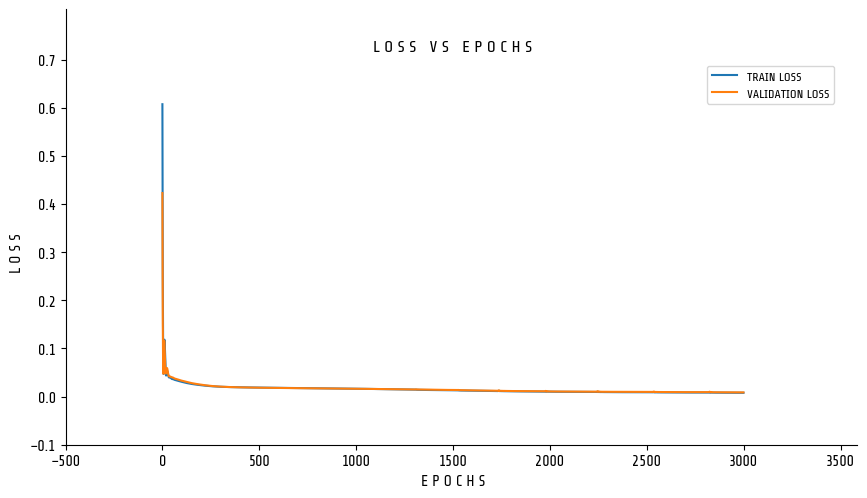

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_loss, label='Train Loss')
ax.plot(val_loss, label='Validation Loss')
utils.make_fig_pretty(ax, title='Loss vs Epochs', xlabel='Epochs', ylabel='Loss',ctab=True)
plt.show()

As we can see in the following figure, the training loss decreases over time, while the validation loss follows a similar trend. However, the validation loss starts to slowly deviate from the training loss after a certain number of epochs. This indicates that the model is starting to overfit the training data. The point at which the validation loss starts to increase is known as the "early stopping" point. This is the point at which we should stop training the model to prevent overfitting.

Since we are training a model with MSE loss, we can also plot the predicted output against the actual output to see how well the model is performing. The predicted output should be close to the actual output, and the points should be clustered around the diagonal line. If the points are scattered far from the diagonal line, it indicates that the model is not performing well.

We can also compute the R-squared value to quantify the performance of the model. The R-squared value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The R-squared value ranges from 0 to 1, where 0 indicates that the model does not explain any of the variance in the data, and 1 indicates that the model explains all of the variance in the data.

For this step we are going to use the test set to evaluate the model. 

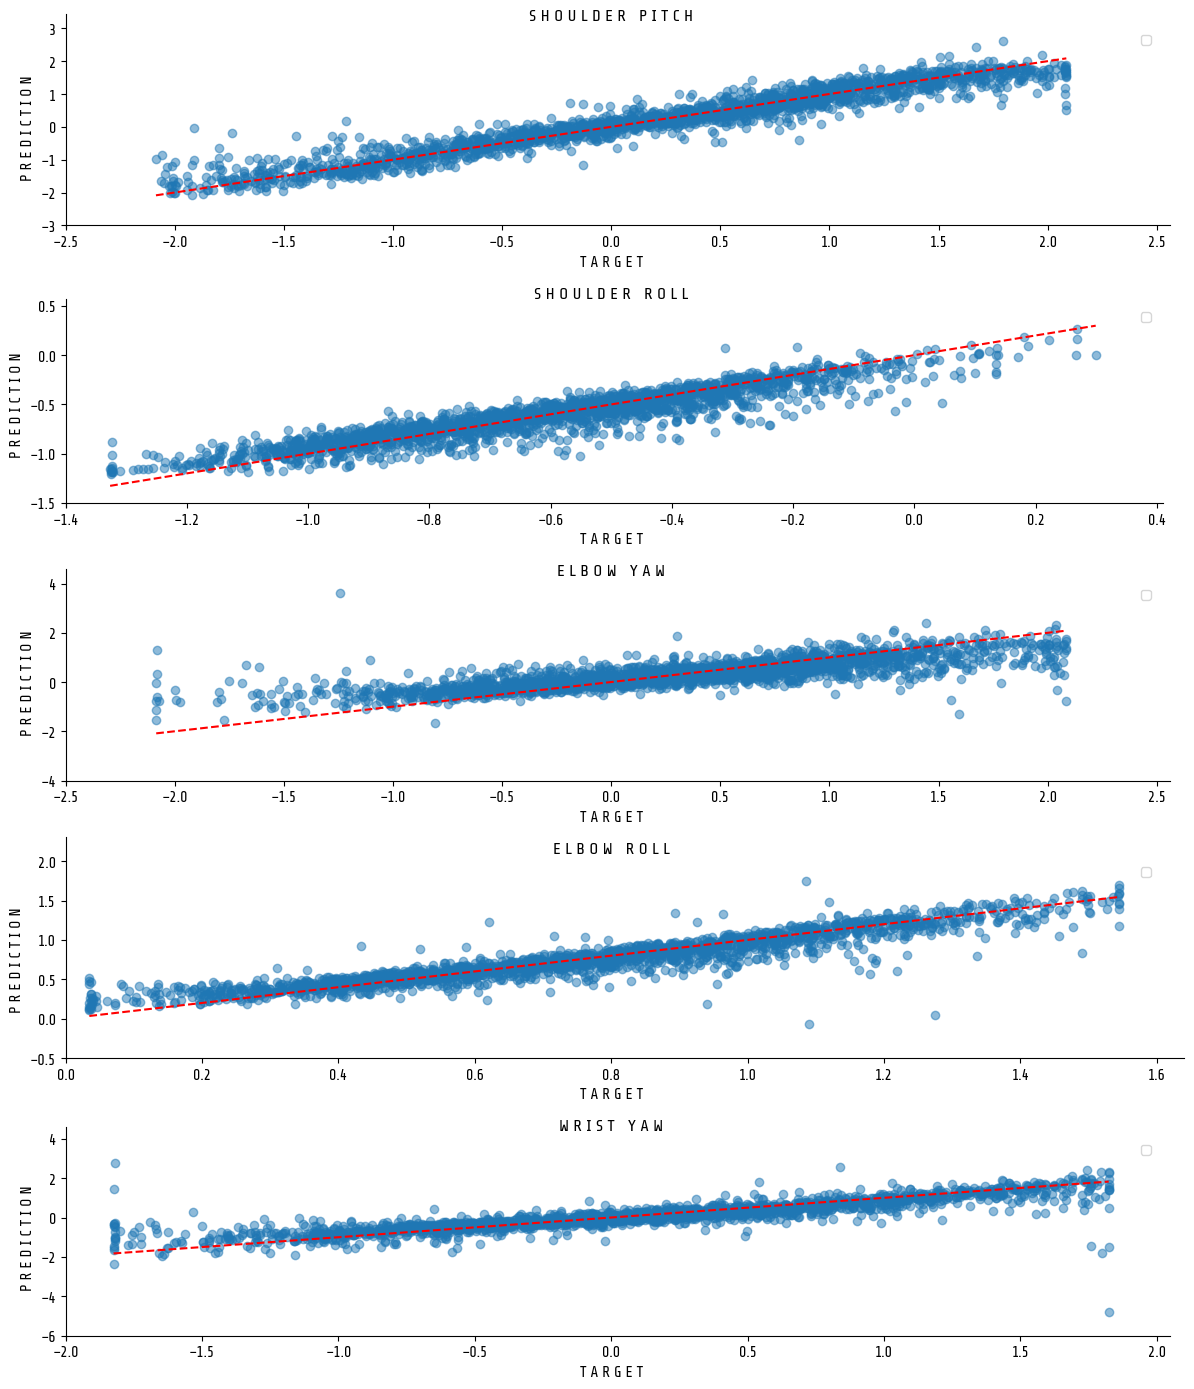

In [ ]:
# Plot test vs prediction
# TODO: Use the model to get predictions on the test set
# Hint: Make sure the model is in evaluation mode

# Your code here

# Get the original test values
y_test_vals = y_test.values

# TODO: Inverse transform the predictions to get the original scale
# Hint: Use the y_scaler we defined earlier
# Also detach the tensor and convert to numpy for plotting
y_test_pred = # Your code here

joints = ['Shoulder Pitch',
          'Shoulder Roll',
          'Elbow Yaw',
          'Elbow Roll',
          'Wrist Yaw']
fig, ax = plt.subplots(figsize=(12, 14), nrows=5, ncols=1)

for ix in range(5):
    ax[ix].scatter(y_test_vals[:, ix], y_test_pred[:, ix], alpha=0.5)
    ax[ix].plot([y_test_vals[:, ix].min(), y_test_vals[:, ix].max()],
               [y_test_vals[:, ix].min(), y_test_vals[:, ix].max()], 'r--')
    ax[ix].set_xlim(y_test_vals[:, ix].min(), y_test_vals[:, ix].max())
    utils.make_fig_pretty(ax[ix], title=f'{joints[ix]}',
                         xlabel='Target', ylabel='Prediction')
plt.tight_layout()

In [ ]:
def evaluate(model: torch.nn.Module,
           features: torch.Tensor,
           targets: torch.Tensor):
    
    # TODO: Set the model to evaluation mode
    # Hint: Use model.eval() to disable layers like dropout during evaluation
    
    # Your code here

    # Disable gradient computation
    with torch.no_grad():
        # TODO: Pass the features through the model to get predictions
        y_pred = # Your code here
        
        # TODO: Calculate the loss between predictions and targets
        # Hint: Use model.criterion(y_pred, targets)
        loss = # Your code here

    return loss.item()

# TODO: Calculate the test loss using the evaluate function
loss = # Your code here

# TODO: Set the model to evaluation mode before making predictions
# Your code here

# TODO: Create predictions to compute the R2 score
# Make sure to disable gradient computation using with torch.no_grad():
with torch.no_grad():
    # TODO: Pass test features through the model
    y_pred = # Your code here
    
    # TODO: Convert predictions back to original scale
    # Hint: Use y_scaler.inverse_transform()
    y_pred = # Your code here

# TODO: Convert test targets back to original scale
y_test_eval = # Your code here

# Display the results
print(f"R2 Score: {utils.r2_score(y_test_eval, y_pred)}")
print(f"Test Loss: {loss:.4f}")

R2 Score: 0.8535802960395813
Test Loss: 0.0082
